In [1]:
import numpy as np
import pandas as pd
from gower.gower_dist import *

In [2]:
df = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})

In [3]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), weight=np.ones(2)))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.12352941 0.25294118 0.37058824 0.5        0.5
 0.62352941 0.75294118 0.87058824 1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
5,M,F,15,15
6,M,F,15,36
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


In [4]:
distances = np.diag(gower_matrix(df[["Sex1", "Age1"]].to_numpy(), df[["Sex2", "Age2"]].to_numpy(), R=(25, 75)))
print(distances)
df.loc[np.argsort(distances)]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.24418605 0.5        0.5        0.5        0.125
 0.36918605 0.625      0.625      0.625     ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
5,M,F,15,15
1,M,M,15,36
6,M,F,15,36
2,F,F,15,58
3,F,F,15,78
4,F,F,15,100
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


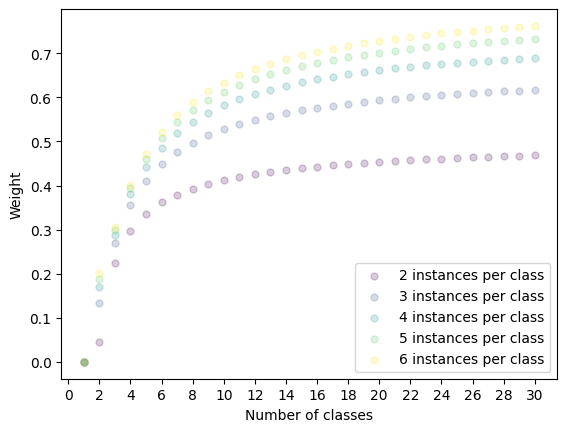

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = mcolors._colors_full_map

for i in range(1, 31):
    X = []
    for j in range(2, 7):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        plt.scatter(i, x, c=j, alpha=0.2, s=25, vmin=2, vmax=6)
        X.append(x)
plt.xticks(range(0, 31, 2))
plt.xlabel("Number of classes")
plt.ylabel("Weight")
plt.legend([f"{i} instances per class" for i in range(2, 7)])

plt.show()


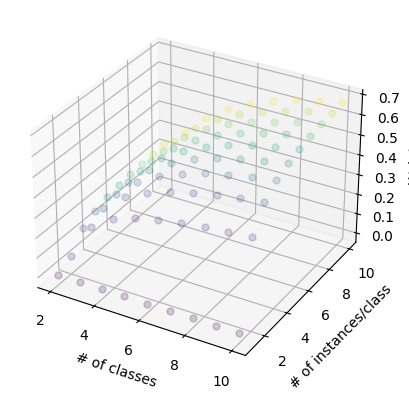

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = mcolors._colors_full_map

ax = plt.axes(projection="3d")

for i in range(2, 11):
    X = []
    for j in range(1, 11):
        x = get_cat_weight(list(''.join(chr(k) for k in range(i))) * j)
        ax.scatter3D(i, j, x, alpha=0.2, c=j, s=25, vmin=1, vmax=10)
        X.append(x)
ax.set_xlabel("# of classes")
ax.set_ylabel("# of instances/class")
ax.set_zlabel("Weight")

plt.show()


In [7]:
dd = pd.read_csv("dog_adoption/allDogDescriptions.csv", index_col=0)

# get rid of columns with the most destructive nans

def isolate_nans(column):
    all_other_nans = nans[[c for c in cols if c != column]].sum(axis=1)
    mask = all_other_nans < np.median(all_other_nans)
    mask &= nans[column]
    return mask.sum()

nans = dd.isna()
cols = dd.columns
isolated_nans = {c: isolate_nans(c) for c in cols}
median_count = np.median([v for v in isolated_nans.values() if v > 0])
for column, count in isolated_nans.items():
    if count > median_count:
        print(column)
        dd.drop(column, axis=1, inplace=True)
dd.dropna(inplace=True)  # dd.mode().iloc[0]

# make bools strings

is_bool = dd.dtypes == bool
dd.loc[:, is_bool] = dd[dd.columns[is_bool]].astype(str)

breed_secondary
color_primary
color_secondary
color_tertiary
declawed
env_cats


In [8]:
matrix = gower_matrix(dd.to_numpy(), chunksize=20)

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/13729 [00:00<?, ?it/s]

In [9]:
pd.DataFrame(matrix).describe()

,0,1,2,3,4,5,6,7,8,9,...,13719,13720,13721,13722,13723,13724,13725,13726,13727,13728
count,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,...,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000,13729.000000
mean,0.033043,0.031757,0.032297,0.032626,0.032631,0.032626,0.032630,0.032296,0.032625,0.031082,...,0.034661,0.036371,0.036509,0.036835,0.035935,0.036297,0.037386,0.045167,0.046999,0.048178
std,0.003186,0.003403,0.003008,0.003118,0.003121,0.003118,0.003121,0.003008,0.003119,0.004201,...,0.003389,0.002421,0.002582,0.002152,0.003448,0.003493,0.003506,0.002669,0.002700,0.003077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031930,0.030496,0.030853,0.031259,0.031254,0.031259,0.031254,0.030852,0.031258,0.030475,...,0.033985,0.035801,0.036002,0.036274,0.035219,0.035939,0.037174,0.044700,0.046667,0.047982
50%,0.032422,0.031348,0.031590,0.032046,0.032045,0.032046,0.032045,0.031589,0.032046,0.031380,...,0.035772,0.036961,0.037138,0.037291,0.037219,0.037513,0.038636,0.045923,0.047810,0.049185
75%,0.033375,0.032511,0.032718,0.033094,0.033100,0.033093,0.033100,0.032717,0.033093,0.032489,...,0.036680,0.037709,0.037859,0.038003,0.038018,0.038235,0.039332,0.046652,0.048499,0.049922
max,0.066215,0.066455,0.066792,0.066455,0.066181,0.066455,0.066180,0.066791,0.066455,0.065972,...,0.061130,0.060234,0.059183,0.058989,0.058540,0.058779,0.057589,0.050823,0.049749,0.051174


In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.016, min_samples=1, metric="precomputed")
dd["gower_dbscan"] = dbscan.fit_predict(matrix)

In [32]:
_, counts = np.unique(dd["gower_dbscan"], return_counts=True)
np.unique(counts, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,  41,  42,
         43,  44,  45,  46,  47,  50,  51,  54,  55,  56,  59,  60,  63,
         64,  66,  71,  75,  79,  80,  96, 102, 107, 113, 114, 130, 153,
        212, 403]),
 array([2284,  499,  211,  112,   82,   69,   49,   48,   31,   33,   23,
          19,   18,   10,   16,    6,   11,    9,    6,   12,    8,    9,
           6,    4,    8,    1,    4,    4,    5,    3,    2,    2,    2,
           3,    5,    3,    2,    2,    1,    1,    1,    1,    2,    3,
           1,    1,    2,    1,    1,    1,    1,    1,    2,    2,    1,
           2,    1,    3,    1,    1,    2,    1,    1,    1,    1,    1,
           1]))

In [33]:
dd.sort_values("gower_dbscan")


,id,org_id,url,type.x,species,breed_primary,breed_mixed,breed_unknown,age,sex,...,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type.y,description,gower_dbscan
index,,,,,,,,,,,,,,,,,,,,,
4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dog,Dachshund,False,False,Young,Male,...,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...,0
309,45755163,NV184,https://www.petfinder.com/dog/shay-45755163/nv...,Dog,Dog,Terrier,True,False,Young,Female,...,2019-08-27T06:03:06+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Shay is a sweet terrier who gets along well wi...,0
310,45755148,NV184,https://www.petfinder.com/dog/mia-45755148/nv/...,Dog,Dog,Rat Terrier,True,False,Adult,Female,...,2019-08-27T05:53:55+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Mia came to us with one newborn puppy and now ...,0
318,45745473,NV184,https://www.petfinder.com/dog/maddie-45745473/...,Dog,Dog,Border Collie,True,False,Adult,Female,...,2019-08-26T06:14:42+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Maddie is a spunky girl who loves to run and p...,0
319,45745442,NV184,https://www.petfinder.com/dog/willie-45745442/...,Dog,Dog,Chihuahua,True,False,Baby,Male,...,2019-08-26T05:45:26+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,"The many faces of Willie - smiling or serious,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58072,38637037,WV193,https://www.petfinder.com/dog/rocky-38637037/w...,Dog,Dog,Beagle,False,False,Adult,Male,...,2017-07-01T01:34:08+0000,Belington,WV,26250,US,WV,2019-09-20,Dog,"Meet Rocky, He is a 9 year old male Chihuahua ...",3655
58095,36112336,WV86,https://www.petfinder.com/dog/maxx-36112336/wv...,Dog,Dog,Pit Bull Terrier,True,False,Adult,Male,...,2016-08-31T21:54:00+0000,Lewisburg,WV,24901,US,WV,2019-09-20,Dog,August 2019 Maxx is a people-lover! He's VER...,3656
58115,28351171,VA674,https://www.petfinder.com/dog/chauncey-2835117...,Dog,Dog,Pointer,True,False,Adult,Male,...,2014-01-21T11:06:57+0000,Pearisburg,VA,24134,US,WV,2019-09-20,Dog,Chauncey is a gentle giant who loves people an...,3657
